In [ ]:
from google.colab import auth
auth.authenticate_user()
print('Authenticated')

Authenticated


In [ ]:
# Save output in a variable `df`

%%bigquery --project ds-student-data df
SELECT 
LastName,
FirstName,
Grade,
InitiatedBy,
DateIssued,
IncidentType, 
Location, 
Consequence,
ReviewedBy,
UnexcusedAbsence,
StudentID
FROM `ds-student-data.DistinctiveMTSS.DeansListIncidents`

In [ ]:
df.head(100)

,LastName,FirstName,Grade,InitiatedBy,DateIssued,IncidentType,Location,Consequence,ReviewedBy,UnexcusedAbsence,StudentID
0,Rudd,Trinity,7th,Ms. Kahn,9/24/2019 12:47,Cat 2 - Failing to comply with school imposed ...,Classroom,None,None,10,50515081
1,Rudd,Trene,6th,Ms. Krier,10/3/2019 8:00,None,None,None,None,10,50515079
2,Rudd,Trene,6th,Mrs. Feder,10/1/2019 12:30,None,Recess,None,None,10,50515079
3,Lara,Breanna,2nd,Ms. Barrera,10/1/2019 11:30,Cat 3 - Other,Other,None,None,None,60024765
4,Rudd,Trene,6th,Ms. Barrera,9/23/2019 14:00,Cat 2 - Bullying: threatening and or intimidat...,Other,None,None,10,50515079
...,...,...,...,...,...,...,...,...,...,...,...
95,Cruz,Eyin David,K,Ms. Aviles,10/28/2019 17:30,Cat 2 - Leaving the classroom without permission,Classroom - Enrichment,None,None,1,50557413
96,Cruz,Eyin David,K,Mr. Kliebert,10/22/2019 10:02,Cat 2 - Other,None,None,None,1,50557413
97,Cruz,Eyin David,K,Ms. Aviles,10/18/2019 11:25,"Cat 2 - Disregard for stated school rules, ins...",Classroom - Enrichment,None,None,1,50557413
98,Ofray,Nalani Neveah,K,Ms. Balla,10/7/2019 13:20,Cat 2 - Acts that obstruct/interrupt the instr...,Classroom,None,Mr. Weems,3,60023593


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import graphviz
import seaborn as sns; sns.set()

In [ ]:
#Convert Pandas Column to DateTime
df['DateIssued'] =  pd.to_datetime(df['DateIssued'], infer_datetime_format=True)

In [ ]:
 df.DateIssued.astype

<bound method NDFrame.astype of 0      2019-09-24 12:47:00
1      2019-10-03 08:00:00
2      2019-10-01 12:30:00
3      2019-10-01 11:30:00
4      2019-09-23 14:00:00
               ...        
5689   2019-10-07 08:54:00
5690   2019-10-23 07:24:00
5691   2019-10-16 17:57:00
5692   2019-10-28 10:48:00
5693   2019-09-23 11:53:00
Name: DateIssued, Length: 5694, dtype: datetime64[ns]>

In [ ]:
df['StudentID'].nunique()

1091

In [ ]:
def plot_df(df, columns, save=False):
    for col in columns:
        count_column = df[col].value_counts()[:10]
        plt.figure(figsize=(len(count_column), 5))
        column_figure = sns.barplot(count_column.index, count_column.values, alpha=0.8)
        plt.title('{} values'.format(col))
        plt.ylabel('Number of Counts', fontsize=12)
        plt.xlabel(col, fontsize=12) 

        if save: 
            column_figure.figure.savefig('{}.png'.format(col))
            print('figure is saved as a file ~.png')
        else:
            plt.show()
    return None

In [ ]:
col = ['Grade', 'InitiatedBy',  'Location', 'Consequence','UnexcusedAbsence']

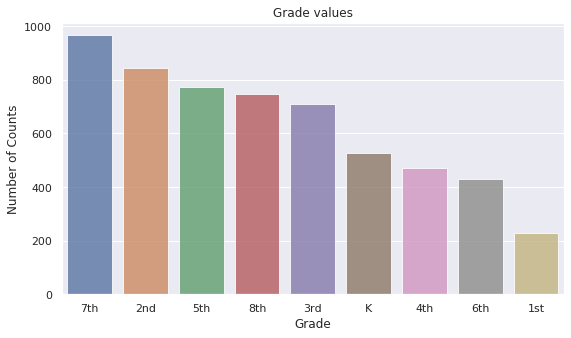

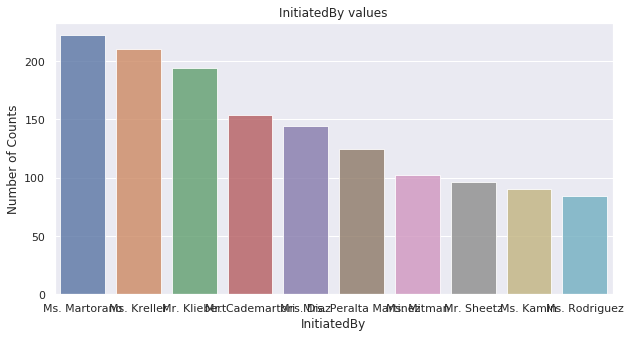

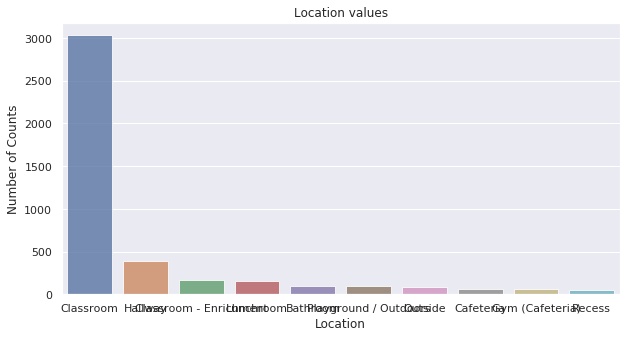

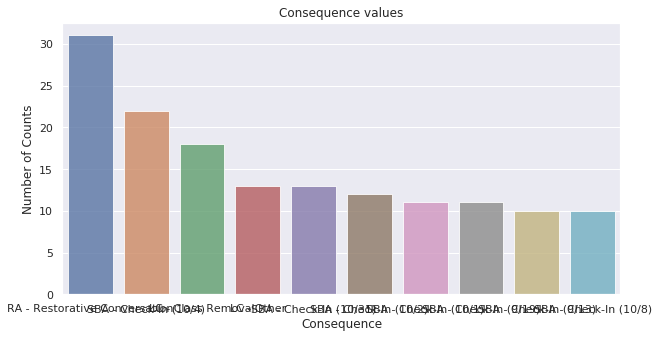

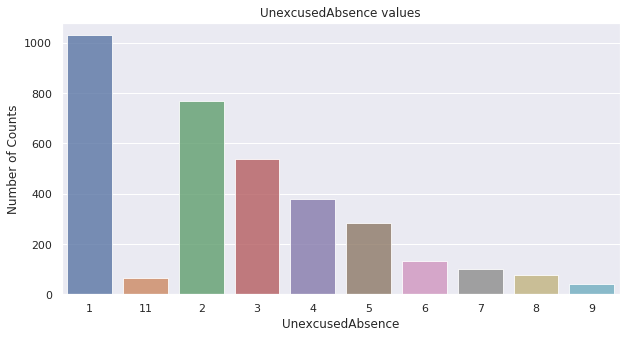

In [ ]:
plot_df(df, col)

In [ ]:
df.tail(20)

,LastName,FirstName,Grade,InitiatedBy,DateIssued,IncidentType,Location,Consequence,ReviewedBy,UnexcusedAbsence,StudentID
5674,Jones,Elijah,7th,Mr. Brinkman,2019-10-29 11:47:00,Cat 2 - Persistent tardiness to class or cutti...,Hallway,None,Mr. Avery Jr.,None,50208023
5675,Jones,Elijah,7th,Mr. Acevedo,2019-10-24 10:00:00,Cat 3 - Acts that endanger the safety of other...,Hallway,None,Mr. Avery Jr.,None,50208023
5676,Jones,Elijah,7th,Mr. Reyna,2019-10-01 18:01:00,Cat 2 - Leaving the classroom without permission,Lunchroom,None,Mr. Avery Jr.,None,50208023
5677,Jones,Elijah,7th,Miss Leitsch,2019-09-25 08:30:00,Cat 2 - Play fighting,Hallway,None,Mr. Avery Jr.,None,50208023
5678,Jones,Elijah,7th,Mr. Bryant,2019-09-24 09:02:00,Cat 2: - Repeated failure to follow stated sch...,Hallway,None,Mr. Avery Jr.,None,50208023
5679,Jones,Elijah,7th,Mr. Bryant,2019-09-23 11:20:00,Cat 2 - Repeated refusal to participate in aca...,Classroom,None,Mr. Avery Jr.,None,50208023
5680,Jones,Elijah,7th,Mr. Bryant,2019-09-23 11:18:00,Cat 2 - Repeated refusal to participate in aca...,Classroom,None,Mr. Avery Jr.,None,50208023
5681,Bowman,Christian,7th,Mrs. Peralta Martinez,2019-10-28 10:48:00,Cat 2 - Acts that obstruct/interrupt the instr...,Classroom,None,Mr. Avery Jr.,None,50360128
5682,Bowman,Christian,7th,Mr. Brinkman,2019-10-24 12:18:00,Cat 2 - Fighting,Classroom,None,Mr. Avery Jr.,None,50360128
5683,Bowman,Christian,7th,Mr. Bryant,2019-10-24 11:55:00,Cat 2 - Fighting,Classroom,None,Mr. Avery Jr.,None,50360128


In [ ]:
# Save output in a variable `df`

%%bigquery --project ds-student-data eny
SELECT *
FROM `ds-student-data.DistinctiveENY.DSEnyLong2`

In [ ]:
eny.shape

(30100, 11)

In [ ]:
eny.ModuleNumber

0        Module 1
1        Module 1
2        Module 1
3        Module 1
4        Module 1
           ...   
30095    Module 2
30096    Module 2
30097    Module 2
30098    Module 2
30099    Module 2
Name: ModuleNumber, Length: 30100, dtype: object

In [ ]:
dy = eny[eny['ModuleNumber'] == 'Module 1']

In [ ]:
dy.shape

(15386, 11)

In [ ]:
dy =dy[['StudentNumber', 'AverageScore']]

In [ ]:
dy =dy.drop_duplicates()

In [ ]:
dy.head()

,StudentNumber,AverageScore
0,2019006,3.50
7,2019009,2.50
14,2019017,2.25
21,2019026,3.50
28,2019028,2.50


In [ ]:
#Make the key column the same name for later join
dy.rename(columns={'StudentNumber':'StudentID'}, inplace=True)

In [ ]:
counts = df.groupby("StudentID")["DateIssued"].count()

In [ ]:
dy.dtypes

StudentID        object
AverageScore    float64
dtype: object

In [ ]:
dy.dropna(subset=['StudentID'])

,StudentID,AverageScore
0,2019006,3.50
7,2019009,2.50
14,2019017,2.25
21,2019026,3.50
28,2019028,2.50
...,...,...
30030,50516409,3.50
30044,50516545,1.50
30058,50519024,2.50
30072,50531723,2.75


In [ ]:
dy.shape

(2134, 2)

In [ ]:
counts=counts.to_frame()

In [ ]:
counts.reset_index(level=0, inplace=True)

In [ ]:
counts.columns

Index(['StudentID', 'DateIssued'], dtype='object')

In [ ]:
dy.shape

(2134, 2)

In [ ]:
counts.astype('object').dtypes

StudentID     object
DateIssued    object
dtype: object

In [ ]:
dy.dtypes

StudentID        object
AverageScore    float64
dtype: object

In [ ]:
dy["StudentID"] = pd.to_numeric(dy["StudentID"])

In [ ]:
#Left join on studentID
results= dy.merge(counts, left_on='StudentID', right_on='StudentID', how='left')

In [ ]:
#Since some students didnt misbehave, we have to fill there counts column by 0
results['DateIssued']=results['DateIssued'].fillna(0)

In [ ]:
results['AverageScore']=results['AverageScore'].fillna(results['AverageScore'].mean())

In [ ]:
results.describe()

,StudentID,AverageScore,DateIssued
count,2.134000e+03,2134.000000,2134.000000
mean,4.976783e+07,2.689074,1.530928
std,1.087871e+08,0.885964,5.962669
min,1.001600e+04,0.250000,0.000000
25%,5.000078e+07,2.000000,0.000000
50%,5.044084e+07,2.750000,0.000000
75%,5.057850e+07,3.500000,1.000000
max,5.036729e+09,4.000000,138.000000


In [ ]:
import numpy as np
import matplotlib.pyplot as plt  # To visualize
import pandas as pd  # To read data
from sklearn.linear_model import LinearRegression

X = results.iloc[:, 2].values.reshape(-1, 1)  # values converts it into a numpy array
Y = results.iloc[:, 1].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions

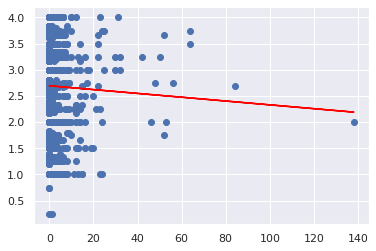

In [ ]:
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()

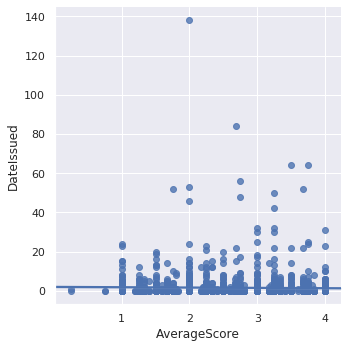

In [ ]:
sns.lmplot(x="AverageScore", y="DateIssued", data=results)